## Importações

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import keras
from keras import layers
from keras import callbacks
from sklearn.neural_network import MLPRegressor

import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pd.options.display.max_columns = None

## Ler Dados

### CSV

In [2]:
df = pd.read_csv('../data/arquivo_fe.csv')
df.shape

(299999, 23)

In [3]:
df.head()

,startingAirport,destinationAirport,elapsedDays,seatsRemaining,searchDateInDays,flightDateInDays,segment1AirlineName,segment2AirlineName,segment3AirlineName,segment4AirlineName,segment1CabinCode,segment2CabinCode,segment3CabinCode,segment4CabinCode,segment1EquipmentDescription,segment2EquipmentDescription,segment3EquipmentDescription,segment4EquipmentDescription,daysDifferenceBetweenSearchAndFlightDate_mcat,totalTravelDistance_mcat,travelDurationInSeconds_mcat,totalFare,isBasicEconomy_True
0,0.0,1.0,0,9,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
1,0.0,1.0,0,4,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
2,0.0,1.0,0,9,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,20.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
3,0.0,1.0,0,8,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
4,0.0,1.0,0,9,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0


### Pickle

In [4]:
with open('../pkls/oe.pickle', 'rb') as handle:
    oe_enc = pickle.load(handle)

with open('../pkls/ohe.pickle', 'rb') as handle:
    ohe_enc = pickle.load(handle)

## Split

In [5]:
TARGET = 'totalFare'

In [6]:
x = df.copy()
y = x.pop(TARGET)

### Padronização

Notamos que após a primeira implementação, o loss estava muito alto, então isso pode ter ocorrido pela variação das escalas dos dados.

Selecionamos as colunas numéricas com valores expressivos.

In [7]:
num_cols = [
    'searchDateInDays',
    'flightDateInDays'
]

In [8]:
standard = StandardScaler().fit(x[num_cols])

In [9]:
x_standard = standard.transform(x[num_cols])

In [10]:
x_standard = pd.DataFrame(x_standard)

In [11]:
x_standard.head()

,0,1
0,-1.556412,-1.453993
1,-1.556412,-1.453993
2,-1.556412,-1.453993
3,-1.556412,-1.453993
4,-1.556412,-1.453993


E juntamos no dataset original.

In [12]:
x[num_cols] = x_standard
x.head()

,startingAirport,destinationAirport,elapsedDays,seatsRemaining,searchDateInDays,flightDateInDays,segment1AirlineName,segment2AirlineName,segment3AirlineName,segment4AirlineName,segment1CabinCode,segment2CabinCode,segment3CabinCode,segment4CabinCode,segment1EquipmentDescription,segment2EquipmentDescription,segment3EquipmentDescription,segment4EquipmentDescription,daysDifferenceBetweenSearchAndFlightDate_mcat,totalTravelDistance_mcat,travelDurationInSeconds_mcat,isBasicEconomy_True
0,0.0,1.0,0,9,-1.556412,-1.453993,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,0.0
1,0.0,1.0,0,4,-1.556412,-1.453993,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,0.0
2,0.0,1.0,0,9,-1.556412,-1.453993,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,20.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,0.0
3,0.0,1.0,0,8,-1.556412,-1.453993,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,0.0
4,0.0,1.0,0,9,-1.556412,-1.453993,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,0.0


Separamos 33% dos valores para teste.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [14]:
x_train.shape, x_test.shape

((200999, 22), (99000, 22))

## Treinamento

Criamos 4 modelos difentes para interpretar os dados, todos utilizando a função de ativação relu, pelo problema de regressão que temos.

#### Model Alfa

O Model Alfa, possui 1 camada com 22 perceptrons, com base o número de colunas.

In [15]:
model_alfa = keras.Sequential(name='Alfa')

model_alfa.add(layers.Input(shape=(x_train.shape[1], )))
model_alfa.add(layers.Dense(22, activation='relu'))
model_alfa.add(layers.Dense(1))

model_alfa.summary()

Model: "Alfa"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_alfa.compile(loss='mse')

In [17]:
history_alfa = model_alfa.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=None)

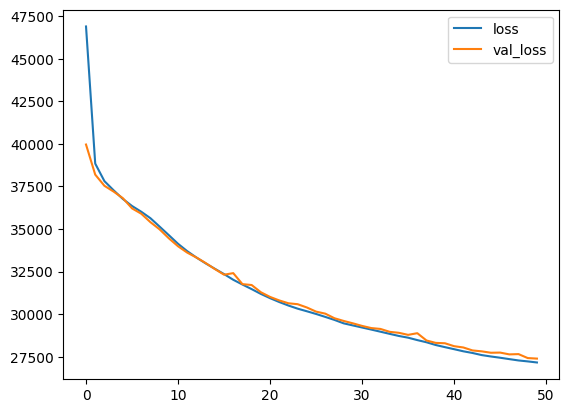

In [18]:
plt.plot(history_alfa.history['loss'], label='loss')
plt.plot(history_alfa.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

#### Model Beta

O modelo Beta possui 2 camadas, sendo a primeira com 22*2=44 perceptrons e a segunda com 22.

In [19]:
model_beta = keras.Sequential(name='Beta')

model_beta.add(layers.Input(shape=(x_train.shape[1], )))
model_beta.add(layers.Dense(22*2, activation='relu'))
model_beta.add(layers.Dense(22, activation='relu'))
model_beta.add(layers.Dense(1))

model_beta.summary()

Model: "Beta"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 44)             │         1,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,025 (7.91 KB)

 Trainable params: 2,025 (7.91 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_beta.compile(loss='mse')

In [21]:
history_beta = model_beta.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=None)

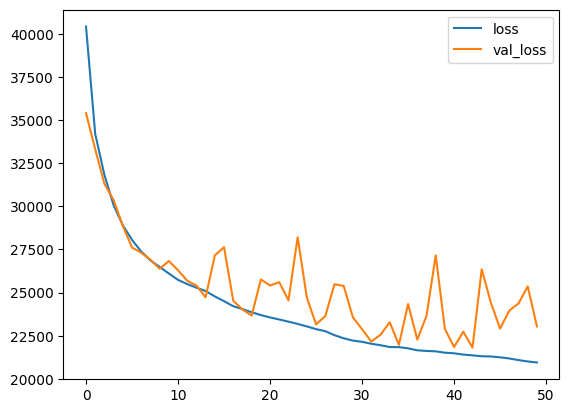

In [22]:
plt.plot(history_beta.history['loss'], label='loss')
plt.plot(history_beta.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

#### Model Delta

O modelo Delta, possui 4 camadas.

In [23]:
model_delta = keras.Sequential(name='Delta')

model_delta.add(layers.Input(shape=(x_train.shape[1], )))
model_delta.add(layers.Dense(22*4, activation='relu'))
model_delta.add(layers.Dense(22*4, activation='relu'))
model_delta.add(layers.Dense(22*2, activation='relu'))
model_delta.add(layers.Dense(22, activation='relu'))
model_delta.add(layers.Dense(1))

model_delta.summary()

Model: "Delta"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 88)             │         2,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 88)             │         7,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 44)             │         3,916 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 22)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,785 (57.75 KB)

 Trainable params: 14,785 (57.75 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_delta.compile(loss='mse')

In [25]:
history_delta = model_delta.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=None)

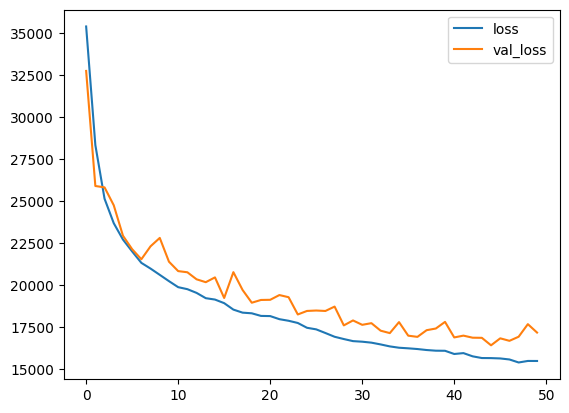

In [26]:
plt.plot(history_delta.history['loss'], label='loss')
plt.plot(history_delta.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

#### Model Sigma

O modelo Sigma, possui 22 camadas com 22 perceptrons.

In [27]:
model_sigma = keras.Sequential(name='Sigma')

model_sigma.add(layers.Input(shape=(x_train.shape[1], )))
for i in np.arange(22):
    model_sigma.add(layers.Dense(22, activation='relu'))
model_sigma.add(layers.Dense(1))

model_sigma.summary()

Model: "Sigma"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,155 (43.57 KB)

 Trainable params: 11,155 (43.57 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_sigma.compile(loss='mse')

In [29]:
history_sigma = model_sigma.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=None)

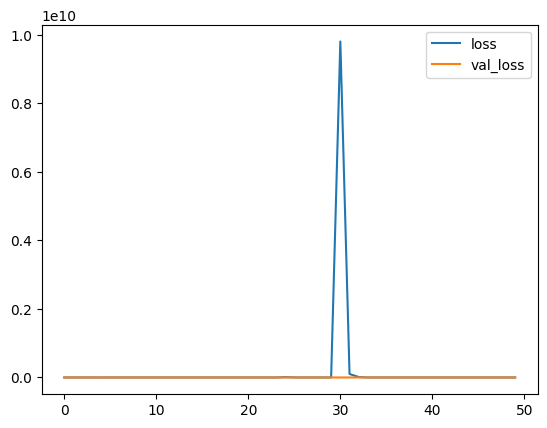

In [30]:
plt.plot(history_sigma.history['loss'], label='loss')
plt.plot(history_sigma.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Decidimos utilizar o nosso modelo Delta, pois teve os melhores resultado do 4 modelos, e compara-lo com o MLP do scikit.

Vamos realizar essa comparação dos 2 modelos, pois o nosso ainda não conseguiu atingir bons resultados, com isso essa comparação pode nos ajudar a melhora-lo no futuro.

In [31]:
estim = MLPRegressor(random_state=42)
estim.fit(x_train, y_train)
estim.loss_

C:\Users\Vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


np.float64(10618.401107747173)

Em comparação com o modelo Delta, o MLP já conseguiu diminui o loss para 10.618, sendo aproximadamente 6.000 a menos que o Delta.

### Hyperparameter Tuning

Vamos utilizar o GridSearchCV para encontrar os melhores parametros para o MLP.

Decidimos o uso do GridSearchCV, pois foi visto nas aulas de Ciência de Dados  e pela sua capacidade de realizar vários testes com o modelo.

In [32]:
parameters = {
    'hidden_layer_sizes': np.arange(50, 201, 50),
    'max_iter': np.arange(50, 201, 50)
}
estim = MLPRegressor(random_state=42)
gscv = GridSearchCV(estim, parameters)

In [33]:
gscv.fit(x_train, y_train)

C:\Users\Vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Vitor\AppD

GridSearchCV(estimator=MLPRegressor(random_state=42),
             param_grid={'hidden_layer_sizes': array([ 50, 100, 150, 200]),
                         'max_iter': array([ 50, 100, 150, 200])})

Com o GridSearch encontramos parametros que podem melhorar o desempenho dos models. Decidimos replicar os parametros no modelo da biblioteca e o nosso.

In [36]:
estim = MLPRegressor(hidden_layer_sizes=200, max_iter=200, random_state=42)
estim.fit(x_train, y_train)

C:\Users\Vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=200, random_state=42)

In [39]:
model_delta = keras.Sequential(name='Delta')
model_delta.add(layers.Input(shape=(x_train.shape[1], )))
model_delta.add(layers.Dense(200, activation='relu'))
model_delta.add(layers.Dense(200, activation='relu'))
model_delta.add(layers.Dense(200, activation='relu'))
model_delta.add(layers.Dense(50, activation='relu'))
model_delta.add(layers.Dense(1))
model_delta.compile(loss='mse', metrics=['mse', 'mae'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_delta.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), callbacks=early_stop)

Epoch 1/200
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 42471.1406 - mae: 127.9407 - mse: 42471.1406 - val_loss: 37011.3828 - val_mae: 138.3885 - val_mse: 37011.3828
Epoch 2/200
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 29001.7129 - mae: 106.0941 - mse: 29001.7129 - val_loss: 25262.0977 - val_mae: 104.7357 - val_mse: 25262.0977
Epoch 3/200
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 24435.6309 - mae: 98.8185 - mse: 24435.6309 - val_loss: 23221.6230 - val_mae: 96.9968 - val_mse: 23221.6230
Epoch 4/200
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 22286.4180 - mae: 95.2671 - mse: 22286.4180 - val_loss: 22261.6582 - val_mae: 92.1204 - val_mse: 22261.6582
Epoch 5/200
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 21200.0234 - mae: 92.6234 - mse: 21200.0234 - val_loss: 21230.5156 - val_mae: 91.7689 - val_mse: 21230.5156
Epoch 6/200
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 19801.4082 - mae: 90.6651 - mse: 19801.4082 - val_loss: 20164.3340 - val_mae: 

## Avaliação do Modelo

Após o treinamento, o modelo foi avaliado utilizando as métricas:

- Erro Quadrático Médio (MSE): Mede o erro médio ao quadrado entre os valores previstos e reais. Quanto menor, melhor.
- Erro Absoluto Médio (MAE): Mede o erro médio absoluto entre os valores previstos e reais. Quanto menor, melhor.
- R² (Coeficiente de Determinação): Mede o quanto o modelo explica da variabilidade dos dados. Varia de 0 a 1 (quanto mais próximo de 1, melhor).

Os resultados mostraram os valores dessas métricas, permitindo analisar se o modelo está com desempenho satisfatório ou se precisa de ajustes (como mais dados, engenharia de atributos ou ajuste de hiperparâmetros). Além disso, foi gerado um gráfico de dispersão entre os valores reais e previstos, permitindo visualizar se o modelo está prevendo bem ou se há muitos desvios.

Essas métricas são apropriadas para problemas de regressão, como é o caso do target 'totalFare'.

In [40]:
y_pred_delta = model_delta.predict(x_test).flatten()
y_pred_estim = estim.predict(x_test).flatten()

3094/3094 ━━━━━━━━━━━━━━━━━━━━ 3s 828us/step


### MSE

In [42]:
mse_delta = mean_squared_error(y_test, y_pred_delta)
mse_delta

12260.735052286005

In [43]:
mse_estim = mean_squared_error(y_test, y_pred_estim)
mse_estim

19525.07079188873

### MAE

In [44]:
mae_delta = mean_absolute_error(y_test, y_pred_delta)
mae_delta

71.43015126651494

In [45]:
mae_estim = mean_absolute_error(y_test, y_pred_estim)
mae_estim

89.14882009701046

### R²

In [46]:
r2_delta = r2_score(y_test, y_pred_delta)
r2_delta

0.7652629489265257

In [47]:
r2_estim = r2_score(y_test, y_pred_estim)
r2_estim

0.6261841137465701

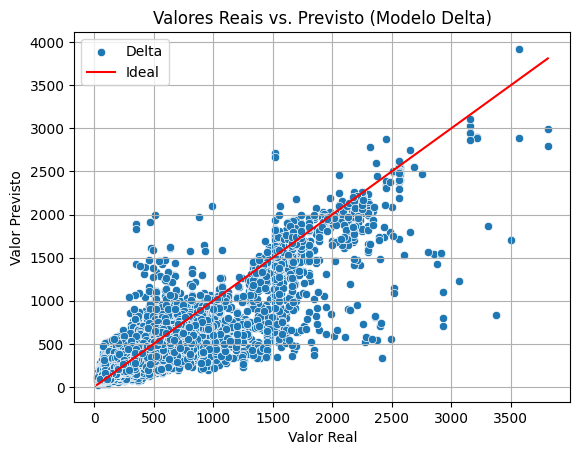

In [49]:
sns.scatterplot(x=y_test, y=y_pred_delta, label='Delta')
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Valores Reais vs. Previsto (Modelo Delta)')
plt.legend()
plt.grid(True)
plt.show()

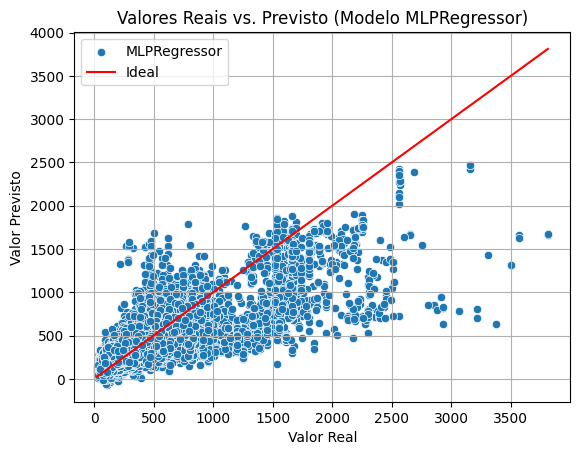

In [51]:
sns.scatterplot(x=y_test, y=y_pred_estim, label='MLPRegressor')
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Valores Reais vs. Previsto (Modelo MLPRegressor)')
plt.legend()
plt.grid(True)
plt.show()